In [101]:
import numpy as np
import pandas as pd 
import itertools

df = pd.read_csv('datasets/student_perform.csv')
# Any results you write to the current directory are saved as output.
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [102]:
# Courtesy of http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [103]:
print(df.shape)

(480, 17)


In [104]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

**Data Visualization and Exploration**


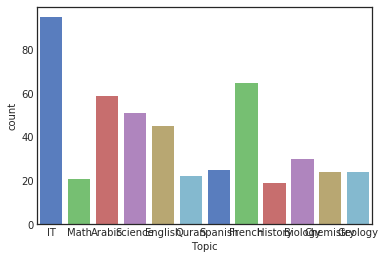

In [105]:
import seaborn as sns
#breakdown by class
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

In [106]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)

In [107]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


It appears that no one failed Geology while students in IT, Chemistry, and Math had the highest probability of failing. 

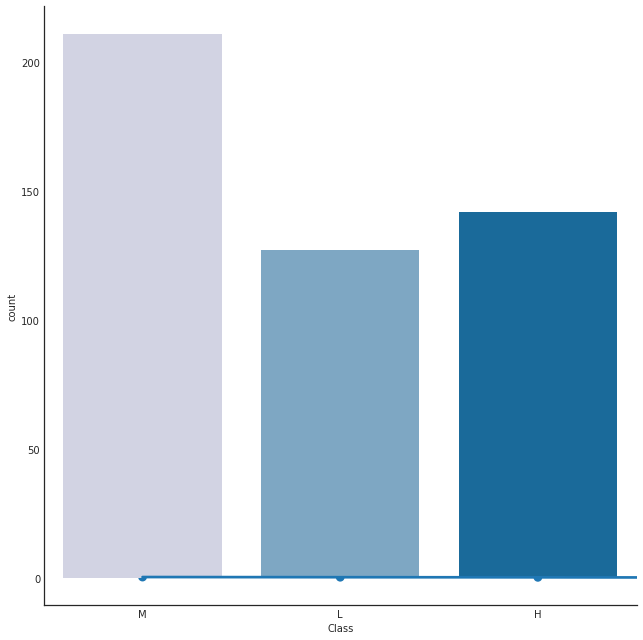

In [108]:
sns.countplot(x='Class',data=df,palette='PuBu')
plt.show()

In [109]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

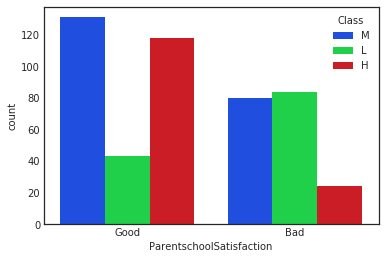

In [110]:
sns.countplot(x='ParentschoolSatisfaction',data = df, hue='Class',palette='bright')
plt.show()

In [111]:
sns.factorplot('Relation','Failed',data=df)

From the students who did well, a large majority of their parents were satisfied with the education they received. The students whose parents were least satisfied with the school performed much worse. The students whose mothers were responsible for them had a higher chance of performing well. 

In [112]:
sns.factorplot("gender","Failed",data=df)

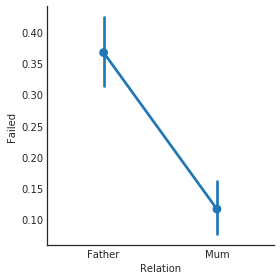

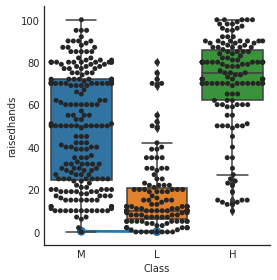

In [113]:
Raised_hand = sns.boxplot(x="Class", y="raisedhands", data=df)
Raised_hand = sns.swarmplot(x="Class", y="raisedhands", data=df, color=".15")
plt.show()

In [114]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=6)
Facetgrid.map(sns.kdeplot,'raisedhands',shade=True)
Facetgrid.set(xlim=(0,df['raisedhands'].max()))
Facetgrid.add_legend()


The boxplot analysis indicates that those who did well were more active in class, and the worst performers were the least active.

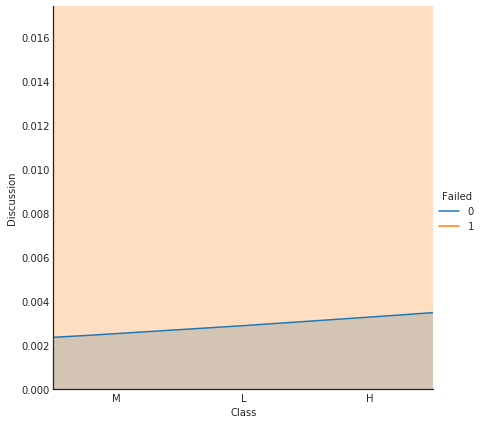

In [115]:
ax = sns.boxplot(x="Class", y="Discussion", data=df)
ax = sns.swarmplot(x="Class", y="Discussion", data=df, color=".25")
plt.show()

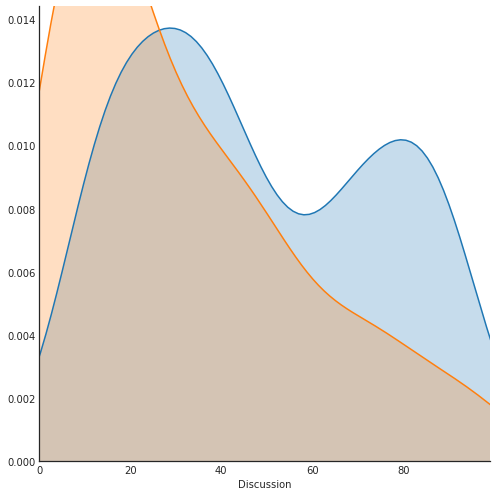

In [116]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'Discussion',shade=True)
Facetgrid.set(xlim=(0,df['Discussion'].max()))
plt.show()

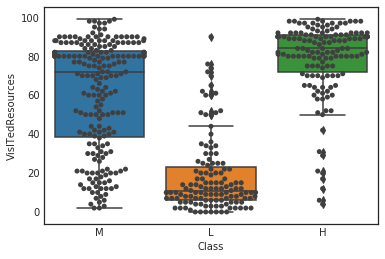

In [117]:
Vis_res = sns.boxplot(x="Class", y="VisITedResources", data=df)
Vis_res = sns.swarmplot(x="Class", y="VisITedResources", data=df, color=".25")
plt.show()

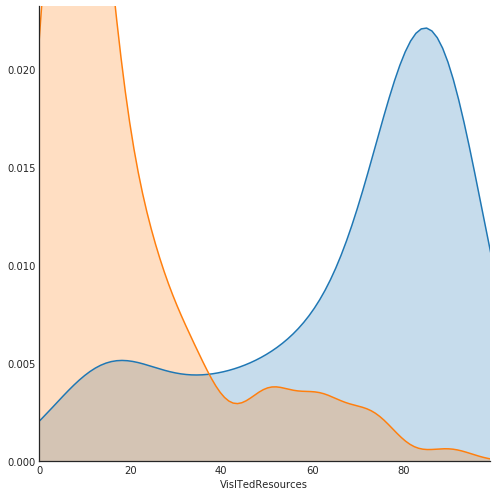

In [118]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'VisITedResources',shade=True)
Facetgrid.set(xlim=(0,df['VisITedResources'].max()))
plt.show()

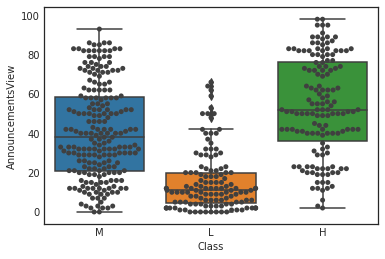

In [119]:
Anounce_bp = sns.boxplot(x="Class", y="AnnouncementsView", data=df)
Anounce_bp = sns.swarmplot(x="Class", y="AnnouncementsView", data=df, color=".25")
plt.show() 

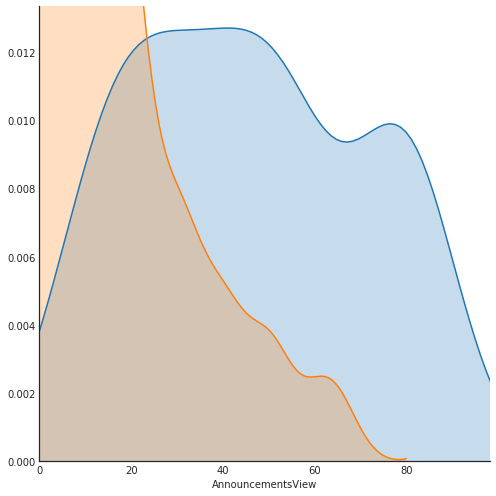

In [120]:
Facetgrid = sns.FacetGrid(df,hue='Failed',size=7)
Facetgrid.map(sns.kdeplot,'AnnouncementsView',shade=True)
Facetgrid.set(xlim=(0,df['AnnouncementsView'].max()))
plt.show()

It is clear that the lowest performers rarely visited the course resources. The swarmplot shapes also indicates that the highest and lowest performers had the most consistent habits with respect to viewing the course resources. It also appears that less students from all groups viewed course announcements, but there is still a clear pattern with viewing course announcements and how well the student performed. 

Now that we see the student's academic behavior by marks,  let's go back and see if this pattern is consistent in the Geology class.

In [121]:
df.groupby('Topic').median()


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed
Topic,,,,,
Arabic,32.0,65.0,41.0,38.0,0.0
Biology,78.5,88.5,54.0,47.0,0.0
Chemistry,79.0,84.5,47.0,30.5,0.0
English,55.0,50.0,33.0,36.0,0.0
French,35.0,80.0,23.0,21.0,0.0
Geology,80.0,82.0,68.5,60.5,0.0
History,69.0,84.0,72.0,65.0,0.0
IT,20.0,25.0,10.0,40.0,0.0
Math,28.0,15.0,19.0,40.0,0.0


In [122]:
df['AbsBoolean'] = df['StudentAbsenceDays']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

The Geology students seemed to participate more frequently than those in other subjects and attended class more than those in any other subject, which could explain why none of the Geology students failed.

In [123]:
df[9:13].describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Failed,AbsBoolean
count,4.000000,4.000000,4.000000,4.000000,4.00,4.00
mean,36.000000,43.750000,18.500000,43.250000,0.25,0.25
std,29.450523,46.636002,13.127579,36.890604,0.50,0.50
min,5.000000,1.000000,0.000000,11.000000,0.00,0.00
25%,15.500000,4.750000,14.250000,11.750000,0.00,0.00
50%,34.500000,43.000000,22.000000,41.000000,0.00,0.00
75%,55.000000,82.000000,26.250000,72.500000,0.25,0.25
max,70.000000,88.000000,30.000000,80.000000,1.00,1.00


**Classification**
First, the perceptron and SVC will be trained on the continuous data.

In [124]:
df['TotalQ'] = df['Class']
df['TotalQ'].loc[df.TotalQ == 'Low-Level'] = 0.0
df['TotalQ'].loc[df.TotalQ == 'Middle-Level'] = 1.0
df['TotalQ'].loc[df.TotalQ == 'High-Level'] = 2.0

continuous_subset = df.ix[:,9:13]
continuous_subset['gender'] = np.where(df['gender']=='M',1,0)
continuous_subset['Parent'] = np.where(df['Relation']=='Father',1,0)


X = np.array(continuous_subset).astype('float64')
y = np.array(df['TotalQ'])
X.shape

/home/rocket/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(480, 6)

In [125]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
group_names = ['H', 'L', 'M']

## Neural Network

** Perceptron **

In [126]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 71


/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


28
Confusion matrix, without normalization
[[28  1 10]
 [ 0 18 16]
 [33 11 27]]


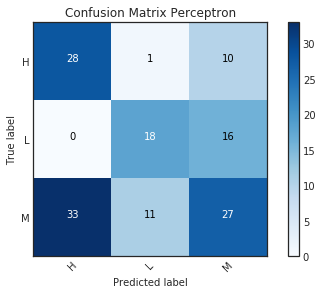

In [127]:
cnf_matrix = confusion_matrix(y_test, y_pred)

print sum((y_test == 'H') & (y_test == y_pred))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix Perceptron')
plt.show()
plt.clf()

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/sit

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/sit

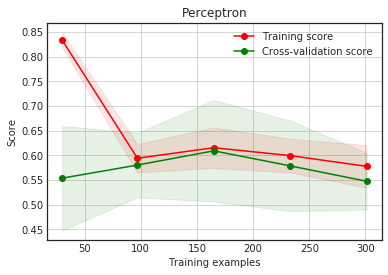

In [128]:
#     Plot learning curve
plot_learning_curve(ppn, "Perceptron", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [129]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.51


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.46      0.72      0.56        39
          L       0.60      0.53      0.56        34
          M       0.51      0.38      0.44        71

avg / total       0.52      0.51      0.50       144



** MLP Classifier **

In [131]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 47


Confusion matrix, without normalization
[[19  0 20]
 [ 0 27  7]
 [11  9 51]]


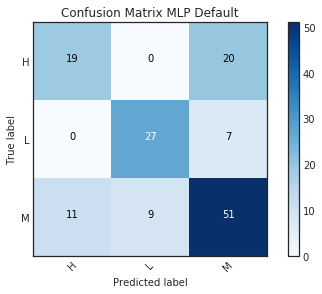

In [132]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP Default')
plt.show()
plt.clf()

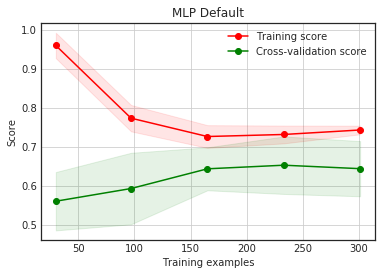

In [133]:
#     Plot learning curve
plot_learning_curve(mlpc, "MLP Default", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [134]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [135]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.63      0.49      0.55        39
          L       0.75      0.79      0.77        34
          M       0.65      0.72      0.68        71

avg / total       0.67      0.67      0.67       144



In [136]:
mlpc = MLPClassifier(solver='sgd', activation='tanh', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 53
Accuracy: 0.63


Misclassified samples: 48
Accuracy: 0.67
Confusion matrix, without normalization
[[22  2 15]
 [ 0 29  5]
 [15 11 45]]


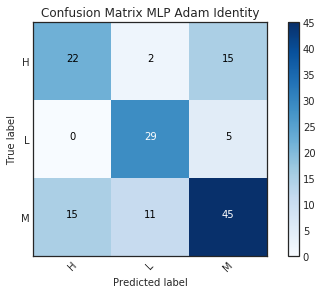

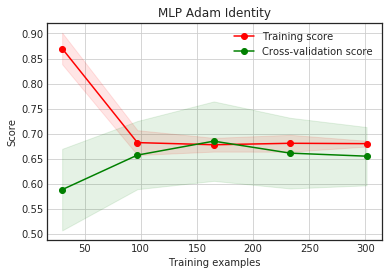

             precision    recall  f1-score   support

          H       0.59      0.56      0.58        39
          L       0.69      0.85      0.76        34
          M       0.69      0.63      0.66        71

avg / total       0.67      0.67      0.66       144



In [137]:
mlpc = MLPClassifier(solver='sgd', activation='identity', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP Adam Identity')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(mlpc, "MLP Adam Identity", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

print(classification_report(y_test, y_pred))

In [138]:
mlpc = MLPClassifier(solver='sgd', activation='logistic', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 73
Accuracy: 0.49


** SGD **

In [139]:
mlpc = MLPClassifier(solver='sgd', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 73


Confusion matrix, without normalization
[[24  0 15]
 [ 3  2 29]
 [24  2 45]]


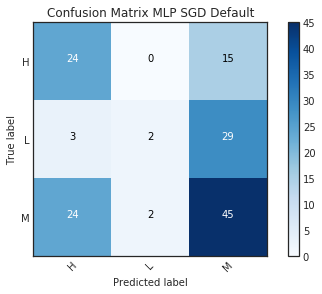

In [140]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP SGD Default')
plt.show()
plt.clf()

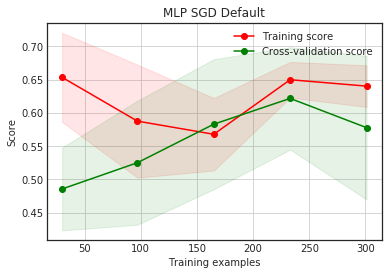

In [141]:
#     Plot learning curve
plot_learning_curve(mlpc, "MLP SGD Default", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [142]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.49


In [143]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.47      0.62      0.53        39
          L       0.50      0.06      0.11        34
          M       0.51      0.63      0.56        71

avg / total       0.49      0.49      0.45       144



In [144]:
mlpc = MLPClassifier(solver='sgd', activation='tanh', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 55
Accuracy: 0.62


In [145]:
mlpc = MLPClassifier(solver='sgd', activation='identity', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 50
Accuracy: 0.65


In [146]:
mlpc = MLPClassifier(solver='sgd', activation='logistic', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 73
Accuracy: 0.49


** LBFGS **

In [147]:
mlpc = MLPClassifier(solver='lbfgs', alpha=.1, hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 53


Confusion matrix, without normalization
[[22  2 15]
 [ 1 24  9]
 [18  8 45]]


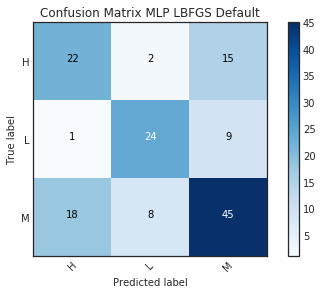

In [148]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP LBFGS Default')
plt.show()
plt.clf()

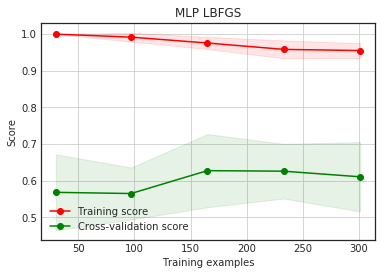

In [149]:
#     Plot learning curve
plot_learning_curve(mlpc, "MLP LBFGS", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [150]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.63


In [151]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.54      0.56      0.55        39
          L       0.71      0.71      0.71        34
          M       0.65      0.63      0.64        71

avg / total       0.63      0.63      0.63       144



In [152]:
mlpc = MLPClassifier(solver='sgd', activation='tanh', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 60
Accuracy: 0.58


In [153]:
mlpc = MLPClassifier(solver='sgd', activation='identity', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 46
Accuracy: 0.68


In [154]:
mlpc = MLPClassifier(solver='sgd', activation='logistic', hidden_layer_sizes=(13,13,13))
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 73
Accuracy: 0.49


## Support Vector Machine

**Linear SVC**

In [155]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 52


Confusion matrix, without normalization
[[19  1 19]
 [ 0 29  5]
 [16 11 44]]


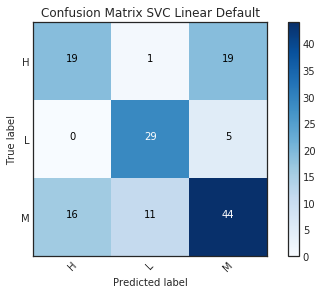

In [156]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC Linear Default')
plt.show()
plt.clf()

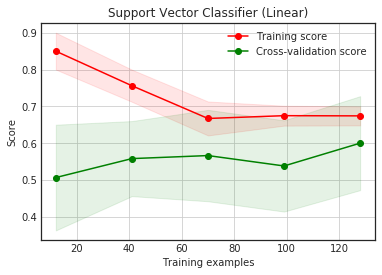

In [157]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (Linear)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [158]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.64


In [159]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.54      0.49      0.51        39
          L       0.71      0.85      0.77        34
          M       0.65      0.62      0.63        71

avg / total       0.63      0.64      0.63       144



**Non-linear SVC with rbf**

In [160]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 47


Confusion matrix, without normalization
[[18  0 21]
 [ 0 24 10]
 [10  6 55]]


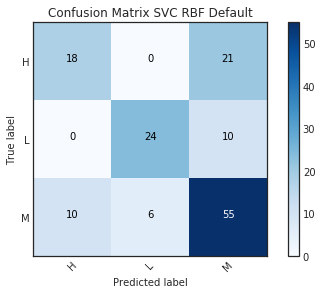

In [161]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC RBF Default')
plt.show()
plt.clf()

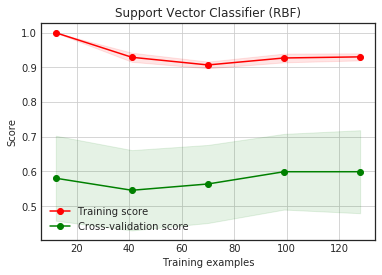

In [162]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (RBF)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [163]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [164]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.64      0.46      0.54        39
          L       0.80      0.71      0.75        34
          M       0.64      0.77      0.70        71

avg / total       0.68      0.67      0.67       144



Misclassified samples: 40
Accuracy: 0.72
Confusion matrix, without normalization
[[23  2 14]
 [ 0 27  7]
 [10  7 54]]


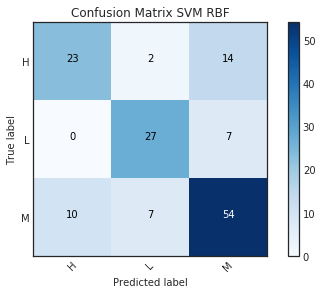

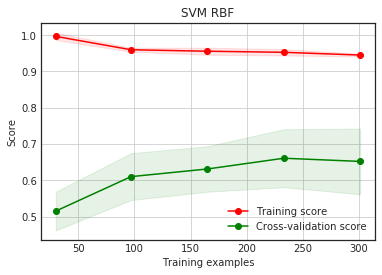

             precision    recall  f1-score   support

          H       0.70      0.59      0.64        39
          L       0.75      0.79      0.77        34
          M       0.72      0.76      0.74        71

avg / total       0.72      0.72      0.72       144



In [165]:
svm = SVC(kernel='rbf', random_state=0, gamma=1.75, C=2)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVM RBF')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(svm, "SVM RBF", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

print(classification_report(y_test, y_pred))

** Non-linear SVC with sigmoid **

In [166]:
svm = SVC(kernel='sigmoid', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 79


Confusion matrix, without normalization
[[14  4 21]
 [ 2 24  8]
 [33 11 27]]


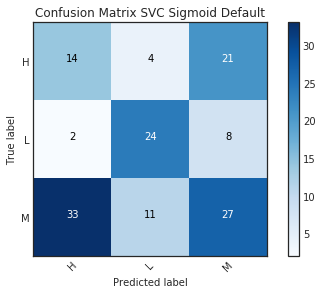

In [167]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC Sigmoid Default')
plt.show()
plt.clf()

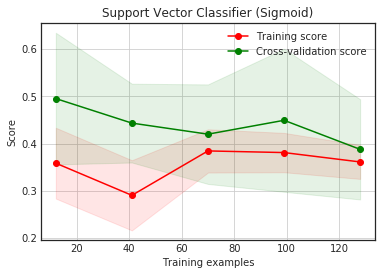

In [168]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (Sigmoid)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [169]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.45


In [170]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.29      0.36      0.32        39
          L       0.62      0.71      0.66        34
          M       0.48      0.38      0.43        71

avg / total       0.46      0.45      0.45       144



** Non-linear SVC with Poly **

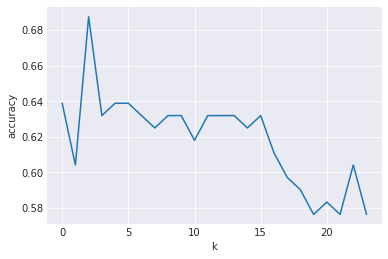

In [176]:
points = []
max_acc = 0
max_svm = None
for i in xrange(1,25):
    svm = SVC(kernel='poly', random_state=0, degree=i, C=1.0)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_svm = svm
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

Confusion matrix, without normalization
[[ 9  3 27]
 [ 0 13 21]
 [ 7  3 61]]


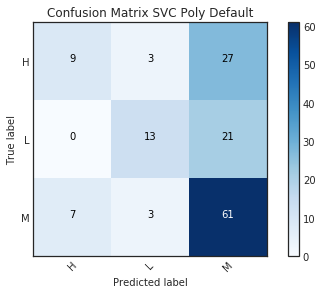

0.6875
{'kernel': 'poly', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': 'ovr', 'random_state': 0, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}


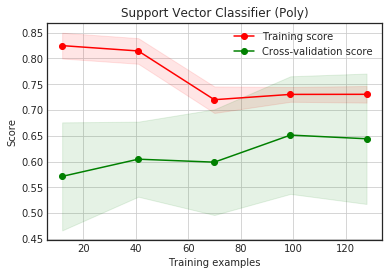

In [177]:
sns.set_style("white")
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC Poly Default')
plt.show()
plt.clf()

print max_acc

print max_svm.get_params()

#     Plot learning curve
plot_learning_curve(max_svm, "Support Vector Classifier (Poly)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

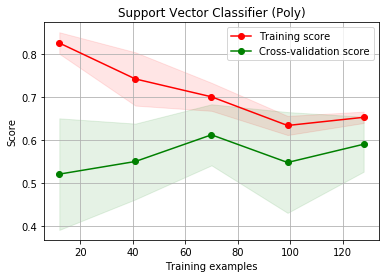

In [73]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (Poly)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [74]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.60


In [75]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.58      0.18      0.27        39
          L       0.66      0.68      0.67        34
          M       0.59      0.80      0.68        71

avg / total       0.60      0.60      0.57       144



## K Nearest Neighbors

** All Neighbors **

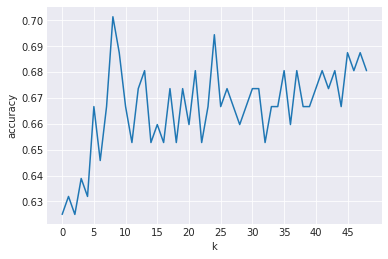

In [76]:
from sklearn.neighbors import KNeighborsClassifier
points = []
max_acc = 0
max_knn = None
for i in xrange(1,50):
    knn = KNeighborsClassifier(weights='distance', leaf_size=1, n_neighbors=i)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_knn = knn
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

{'n_neighbors': 9, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'distance', 'leaf_size': 1}
0.701388888889
Confusion matrix, without normalization
[[24  2 13]
 [ 0 28  6]
 [14  8 49]]


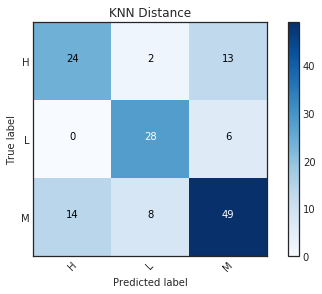

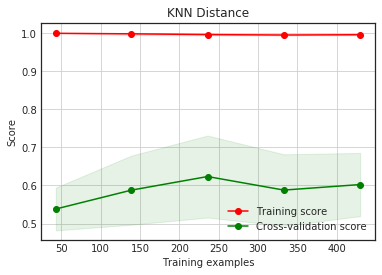

In [77]:
sns.set_style("white")
y_pred = max_knn.predict(X_test_std)
print max_knn.get_params()
print max_acc

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='KNN Distance')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(max_knn, "KNN Distance", X, y, ylim=None, cv=10, n_jobs=4).show()

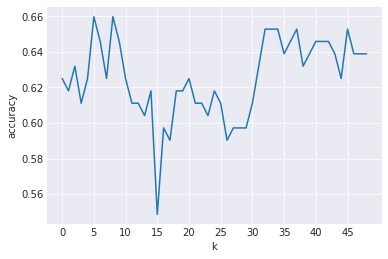

In [78]:
points = []
max_acc = 0
max_knn = None
for i in xrange(1,50):
    knn = KNeighborsClassifier(weights='uniform', leaf_size=1, n_neighbors=i)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_knn = knn
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

{'n_neighbors': 6, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'uniform', 'leaf_size': 1}
0.659722222222
Confusion matrix, without normalization
[[25  1 13]
 [ 1 30  3]
 [20 11 40]]


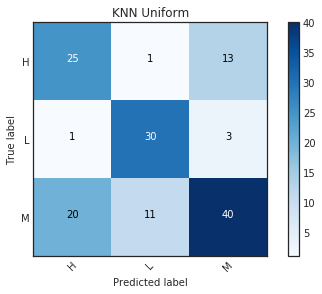

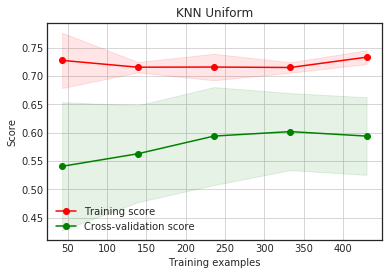

In [79]:
sns.set_style("white")
y_pred = max_knn.predict(X_test_std)

print max_knn.get_params()
print max_acc

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='KNN Uniform')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(max_knn, "KNN Uniform", X, y, ylim=None, cv=10, n_jobs=4).show()

## Decision Tree

** Gini Criteria **

In [80]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='gini')
dct.fit(X_train_std, y_train)
y_pred = dct.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 60


In [81]:
importance = {'features': continuous_subset.columns.values,
              'importance': dct.feature_importances_,
              'criteria': ['gini'] * continuous_subset.shape[1]}

Confusion matrix, without normalization
[[22  1 16]
 [ 1 23 10]
 [24  8 39]]


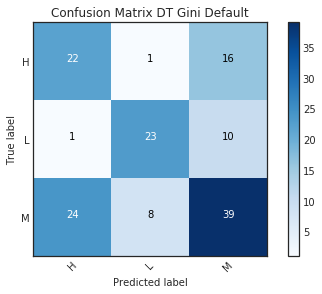

In [82]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix DT Gini Default')
plt.show()
plt.clf()

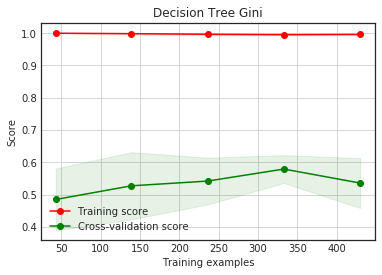

In [83]:
#     Plot learning curve
plot_learning_curve(dct, "Decision Tree Gini", X, y, ylim=None, cv=10, n_jobs=4).show()

In [84]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.58


In [85]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.47      0.56      0.51        39
          L       0.72      0.68      0.70        34
          M       0.60      0.55      0.57        71

avg / total       0.59      0.58      0.59       144



** Entropy Criteria **

In [86]:
dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(X_train_std, y_train)
y_pred = dct.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 53


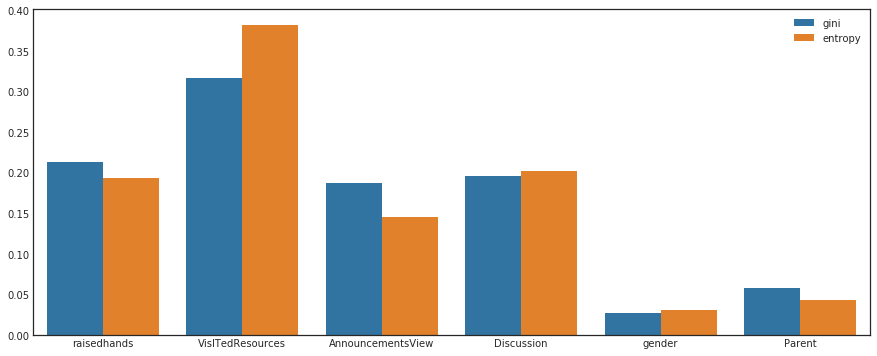

In [87]:
importance['features'] = np.concatenate((importance['features'], continuous_subset.columns.values))
importance['importance'] = np.concatenate((importance['importance'], dct.feature_importances_))
importance['criteria'] = importance['criteria'] + (['entropy'] * continuous_subset.shape[1])
fig = plt.figure(figsize = (15,6))
sns.barplot(hue='criteria', x = 'features', y = 'importance', data = importance)
plt.show()

Confusion matrix, without normalization
[[24  3 12]
 [ 1 24  9]
 [18 10 43]]


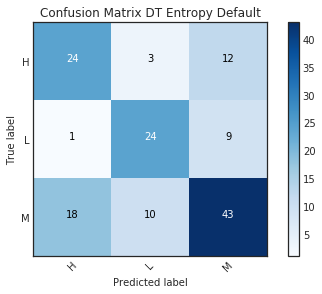

In [88]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix DT Entropy Default')
plt.show()
plt.clf()

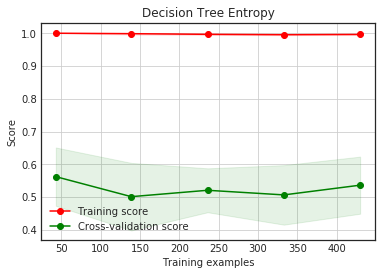

In [89]:
#     Plot learning curve
plot_learning_curve(dct, "Decision Tree Entropy", X, y, ylim=None, cv=10, n_jobs=4).show()

In [90]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.63


In [91]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.56      0.62      0.59        39
          L       0.65      0.71      0.68        34
          M       0.67      0.61      0.64        71

avg / total       0.64      0.63      0.63       144



## Adaboost

** Boost SVM **

In [92]:
from sklearn.ensemble import AdaBoostClassifier
boost = SVC(random_state=0)
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

boost = AdaBoostClassifier(SVC(random_state=0), algorithm='SAMME')
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 52
Accuracy: 0.64
Misclassified samples: 73
Accuracy: 0.49


In [93]:
boost = SVC(random_state=0, decision_function_shape='ovo', C=2.25, coef0=2.5, gamma=0.70000000000000007, kernel='sigmoid')
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
boost = AdaBoostClassifier(SVC(random_state=0, decision_function_shape='ovo', C=2.25, coef0=2.5, gamma=0.70000000000000007, kernel='sigmoid'), algorithm='SAMME')
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 79
Accuracy: 0.45
Misclassified samples: 61
Accuracy: 0.58


Confusion matrix, without normalization
[[14  0 25]
 [ 0 10 24]
 [11  1 59]]


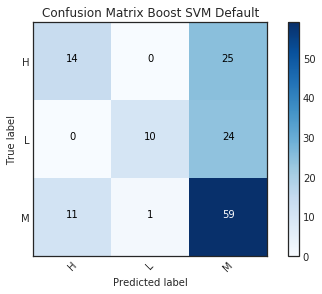

In [94]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix Boost SVM Default')
plt.show()
plt.clf()

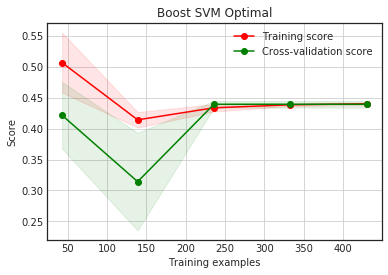

In [95]:
#     Plot learning curve
plot_learning_curve(boost, "Boost SVM Optimal", X, y, ylim=None, cv=10, n_jobs=4).show()

In [96]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.56      0.36      0.44        39
          L       0.91      0.29      0.44        34
          M       0.55      0.83      0.66        71

avg / total       0.64      0.58      0.55       144



** Boost Decision Tree **

In [97]:
boost = DecisionTreeClassifier(random_state=0)
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print accuracy_score(y_test, y_pred)

boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=0))
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print accuracy_score(y_test, y_pred)

0.555555555556
0.722222222222


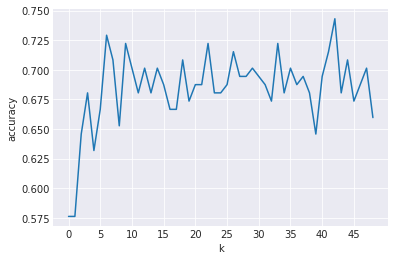

In [98]:
points = []
max_acc = 0
max_boost = None

for depth in xrange(1, 50):
    boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=depth))
    boost.fit(X_train_std, y_train)
    y_pred = boost.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_boost = boost
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

0.743055555556
{'base_estimator__min_samples_split': 2, 'base_estimator__max_depth': 43, 'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=43,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), 'base_estimator__criterion': 'gini', 'base_estimator__max_features': None, 'base_estimator__random_state': 0, 'n_estimators': 50, 'base_estimator__min_weight_fraction_leaf': 0.0, 'random_state': None, 'base_estimator__class_weight': None, 'base_estimator__splitter': 'best', 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__presort': False, 'base_estimator__min_impurity_split': None}
0.555555555556
Confusio

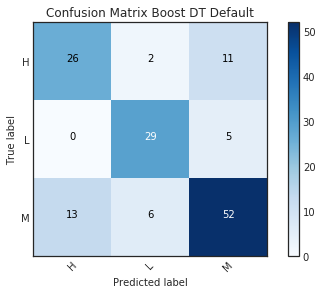

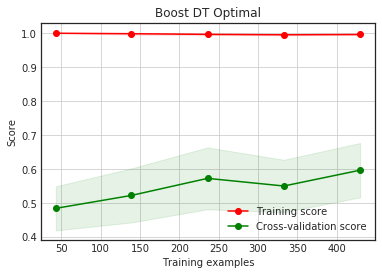

In [99]:
sns.set_style("white")
y_pred = max_boost.predict(X_test_std)

print max_acc

print max_boost.get_params()

boost = DecisionTreeClassifier(random_state=0, max_depth=25)
boost.fit(X_train_std, y_train)
y_pred_a = boost.predict(X_test_std)
print accuracy_score(y_test, y_pred_a)


cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix Boost DT Default')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(max_boost, "Boost DT Optimal", X, y, ylim=None, cv=10, n_jobs=4).show()

In [100]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          H       0.67      0.67      0.67        39
          L       0.78      0.85      0.82        34
          M       0.76      0.73      0.75        71

avg / total       0.74      0.74      0.74       144



# Grid Search
** Neural Network **

In [106]:
classifiers = {}

In [120]:
plt.clf()

tuned_parameters = [{'activation': ['relu', 'identity', 'logistic', 'tanh'],
                     'solver': ['sgd'],
                     'hidden_layer_sizes': [(100,), (13, 13, 13, 13)],
                     'learning_rate': ['constant', 'adaptive'],
                     'learning_rate_init': [1.1, 1, 1e-1, 1e-2],
                     'max_iter': [400, 800, 10000]},
                    {'activation': ['relu', 'identity', 'logistic', 'tanh'],
                     'solver': ['sgd'],
                     'hidden_layer_sizes': [(100,), (13, 13, 13, 13)],
                     'learning_rate': ['invscaling'],
                     'learning_rate_init': [1.1, 1, 1e-1, 1e-2],
                     'power_t': [0.75, 0.5, 1e-1],
                     'max_iter': [400, 800, 10000]}]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=10, verbose=0, scoring='accuracy', n_jobs=4)
clf.fit(X_train_std, y_train)

classifiers['NN'] = clf

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged 

In [105]:
clf = classifiers['NN']

print("Best parameters set found on development set:")
print(clf.best_params_)
print
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print

print("Detailed classification report:")
print
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print
y_true, y_pred = y_test, clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
print


NameError: name 'classifiers' is not defined

In [ ]:
#     Plot learning curve
plot_learning_curve(clf, "Neural Net (Optimized)", X, y, ylim=None, cv=10, n_jobs=4).show()

** Support Vector Machine **

In [453]:
plt.clf()

tuned_parameters = [{'C': np.arange(0.25, 3.0),
                     'kernel': ['rbf'],
                     'gamma': np.arange(0.1, 2.0, 0.1),
                     'decision_function_shape': ['ovo', 'ovr']},
                    {'C': np.arange(0.25, 3.0),
                     'kernel': ['sigmoid'],
                     'gamma': np.arange(0.1, 2.0, 0.1),
                     'decision_function_shape': ['ovo', 'ovr'],
                     'coef0': np.arange(0.25, 3.0, 0.25)},
                    {'C': np.arange(0.25, 3.0),
                     'kernel': ['linear'],
                     'decision_function_shape': ['ovo', 'ovr'],
                     'max_iter': range(100, 10000, 100)},
#                     {'C': np.arange(0.25, 3.0),
#                      'kernel': ['poly'],
#                      'degree': range(1, 6),
#                      'gamma': np.arange(0.1, 2.0, 0.1),
#                      'coef0': np.arange(0.25, 3.0, 0.25),
#                      'decision_function_shape': ['ovo', 'ovr']},
                    {'C': np.arange(0.25, 3.0),
                     'kernel': ['sigmoid'],
                     'gamma': np.arange(0.1, 2.0, 0.1),
                     'decision_function_shape': ['ovo', 'ovr'],
                     'coef0': np.arange(0.25, 3.0, 0.25)}]

svm_trained = []

for params in tuned_parameters:
    svm_trained.append(GridSearchCV(SVC(), params, cv=10, verbose=0, scoring='accuracy', n_jobs=4))
    svm_trained[-1].fit(X_train_std, y_train)
    print "Another one bites the dust!"

classifiers['SVM'] = svm_trained

Another one bites the dust!
Another one bites the dust!


/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

Another one bites the dust!
Another one bites the dust!


In [535]:
for clf in classifiers['SVM']:
    print
    print
    print "NEW THINGY!!!!!"
    print

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = y_test, clf.predict(X_test_std)
    print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print




NEW THINGY!!!!!

Best parameters set found on development set:
{'kernel': 'rbf', 'C': 1.25, 'decision_function_shape': 'ovo', 'gamma': 0.30000000000000004}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.65
             precision    recall  f1-score   support

          H       0.57      0.51      0.54        39
          L       0.72      0.82      0.77        34
          M       0.66      0.65      0.65        71

avg / total       0.65      0.65      0.65       144




NEW THINGY!!!!!

Best parameters set found on development set:
{'decision_function_shape': 'ovo', 'C': 1.25, 'coef0': 2.25, 'gamma': 0.10000000000000001, 'kernel': 'sigmoid'}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.60
             precision    

In [ ]:
#     Plot learning curve
plot_learning_curve(clf, "Support Vector Classifier (Optimized)", X, y, ylim=None, cv=10, n_jobs=4).show()

** Decision Tree **

In [95]:
plt.clf()

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'splitter': ['random', 'best'],
                     'max_depth': range(1, 30),
                     'min_samples_split': np.arange(0.01, 1.0, 0.01),
                     'min_samples_leaf': np.arange(0.01, 0.5, 0.01),
                     'presort': [True]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10, verbose=0, scoring='accuracy', n_jobs=4)
clf.fit(X_train_std, y_train)

classifiers['DT'] = clf

Process PoolWorker-63:
    return recv()
Traceback (most recent call last):
  File "/home/rocket/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
  File "/home/rocket/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rocket/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/pool.py", line 362, in get
KeyboardInterrupt
Process PoolWorker-64:
Traceback (most recent call last):
  File "/home/rocket/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
  File "/home/rocket/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rocket/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/home/rocket/

KeyboardInterrupt: 

In [543]:
clf = classifiers['DT']

print("Best parameters set found on development set:")
print(clf.best_params_)
print
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print

print("Detailed classification report:")
print
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print
y_true, y_pred = y_test, clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
print

KeyError: 'DT'

In [ ]:
#     Plot learning curve
plot_learning_curve(clf, "Decision Tree (optimized)", X, y, ylim=None, cv=10, n_jobs=4).show()